In [1]:
import mlflow

In [2]:
mlflow.autolog()

In [3]:
mlflow.log_metric

<function mlflow.tracking.fluent.log_metric(key: str, value: float, step: Optional[int] = None, synchronous: bool = True, timestamp: Optional[int] = None) -> Optional[mlflow.utils.async_logging.run_operations.RunOperations]>

In [1]:
import torch
torch.__version__


'2.0.1+cu118'

In [2]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [3]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

The console stream is logged into C:\Users\ravit\sg_logs\console.log


[2024-01-18 07:19:12] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-18 07:19:13] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-01-18 07:19:23] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-01-18 07:19:23] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-18 07:19:23] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-18 07:19:23] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-01-18 07:19:23] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [4]:
from IPython.display import clear_output
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [5]:
from super_gradients.training import models

In [6]:
from super_gradients.training import Trainer

In [7]:
CHECKPOINT_DIR = 'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints'
trainer = Trainer(experiment_name='yolo_nas', ckpt_root_dir=CHECKPOINT_DIR)

In [8]:

dataset_params = {
    'data_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside',
    'train_images_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/train/images',
    'train_labels_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/train/labels',
    'val_images_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/valid/images',
    'val_labels_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/valid/labels',
    'test_images_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/test/images',
    'test_labels_dir':'D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/data/test/labels',
    'classes':  ['Airport', 'Dam', 'Dugwell', 'Electric Substation', 'Lake', 'Solar Panel', 'Stadium', 'Windmill']
}

In [13]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':0
    }
)

clear_output()

In [14]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': [640, 640], 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': [640, 640], 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5, 'max_targets': 120),
 DetectionPaddedRescale('swap': (2, 0, 1),

Caching annotations: 100%|██████████| 292/292 [00:00<00:00, 975.23it/s] 


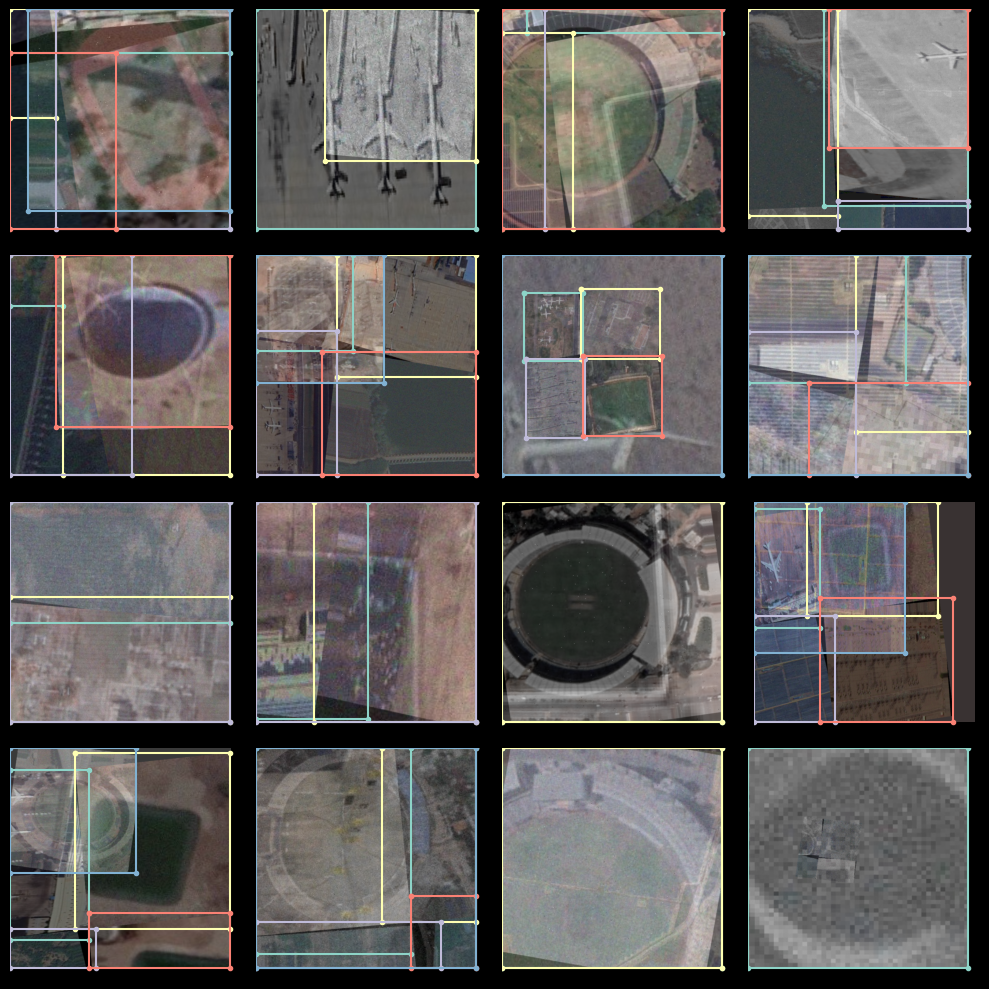

In [15]:
train_data.dataset.plot()

In [16]:
from super_gradients.training import models

In [22]:
####### DONNT RUN THIS WHEN THE MODEL IS TRAINING FOR THE SECOND TIME 
from super_gradients.training import models
model = models.get('yolo_nas_m',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2024-01-17 15:10:54] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [21]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs":100,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


In [22]:
 best_prev_model = models.get('yolo_nas_m',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints/yolo_nas/ckpt_best.pth")
# this part of code is used to load the model from the checkpoints 

[2024-01-18 07:48:26] INFO - checkpoint_utils.py - Successfully loaded model weights from D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints/yolo_nas/ckpt_best.pth EMA checkpoint.


In [18]:
###### THIS IS ONLY TRAINED FOR THE FIRST 11 HOURS AND THEN STOPPED 

%%time
trainer.train(model=model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-01-15 15:52:27] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas/console_Jan15_15_52_28.txt


[2024-01-15 15:52:29] WARNING - base.py - Ignoring invalid distribution -illow (c:\users\ravit\anaconda3\envs\space_hackathon_winner\lib\site-packages)
[2024-01-15 15:52:29] WARNING - base.py - Ignoring invalid distribution -orch (c:\users\ravit\anaconda3\envs\space_hackathon_winner\lib\site-packages)
[2024-01-15 15:52:29] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 7017       (len(train_set))
    - Batch size per GPU:           4          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             4          (num_gpus * batch_size)
    - Effective Batch size:         4          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         1754       (len(train_loader))
    - Gradient updates per epoch:   1754       (len(train_loader) / batch_accumulate

SUMMARY OF EPOCH 0
├── Training
│   ├── Ppyoloeloss/loss = 3.1449
│   ├── Ppyoloeloss/loss_cls = 2.3295
│   ├── Ppyoloeloss/loss_dfl = 1.0919
│   └── Ppyoloeloss/loss_iou = 0.1078
└── Validation
    ├── F1@0.50 = 0.2007
    ├── Map@0.50 = 0.1956
    ├── Ppyoloeloss/loss = 2.0518
    ├── Ppyoloeloss/loss_cls = 1.5471
    ├── Ppyoloeloss/loss_dfl = 0.8568
    ├── Ppyoloeloss/loss_iou = 0.0305
    ├── Precision@0.50 = 0.1263
    └── Recall@0.50 = 0.8197



[2024-01-15 16:11:36] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 16:11:36] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.195591002702713
Validation epoch 1: 100%|██████████| 74/74 [00:16<00:00,  4.37it/s]


SUMMARY OF EPOCH 1
├── Training
│   ├── Ppyoloeloss/loss = 1.9512
│   │   ├── Best until now = 3.1449 (↘ -1.1938)
│   │   └── Epoch N-1      = 3.1449 (↘ -1.1938)
│   ├── Ppyoloeloss/loss_cls = 1.3011
│   │   ├── Best until now = 2.3295 (↘ -1.0285)
│   │   └── Epoch N-1      = 2.3295 (↘ -1.0285)
│   ├── Ppyoloeloss/loss_dfl = 0.9131
│   │   ├── Best until now = 1.0919 (↘ -0.1788)
│   │   └── Epoch N-1      = 1.0919 (↘ -0.1788)
│   └── Ppyoloeloss/loss_iou = 0.0774
│       ├── Best until now = 0.1078 (↘ -0.0304)
│       └── Epoch N-1      = 0.1078 (↘ -0.0304)
└── Validation
    ├── F1@0.50 = 0.0496
    │   ├── Best until now = 0.2007 (↘ -0.151)
    │   └── Epoch N-1      = 0.2007 (↘ -0.151)
    ├── Map@0.50 = 0.4453
    │   ├── Best until now = 0.1956 (↗ 0.2497)
    │   └── Epoch N-1      = 0.1956 (↗ 0.2497)
    ├── Ppyoloeloss/loss = 1.7057
    │   ├── Best until now = 2.0518 (↘ -0.3461)
    │   └── Epoch N-1      = 2.0518 (↘ -0.3461)
    ├── Ppyoloeloss/loss_cls = 1.2353
    │   ├── Be

[2024-01-15 16:29:56] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 16:29:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4452657401561737
Validation epoch 2: 100%|██████████| 74/74 [00:16<00:00,  4.41it/s]


SUMMARY OF EPOCH 2
├── Training
│   ├── Ppyoloeloss/loss = 1.856
│   │   ├── Best until now = 1.9512 (↘ -0.0952)
│   │   └── Epoch N-1      = 1.9512 (↘ -0.0952)
│   ├── Ppyoloeloss/loss_cls = 1.2363
│   │   ├── Best until now = 1.3011 (↘ -0.0647)
│   │   └── Epoch N-1      = 1.3011 (↘ -0.0647)
│   ├── Ppyoloeloss/loss_dfl = 0.8757
│   │   ├── Best until now = 0.9131 (↘ -0.0373)
│   │   └── Epoch N-1      = 0.9131 (↘ -0.0373)
│   └── Ppyoloeloss/loss_iou = 0.0727
│       ├── Best until now = 0.0774 (↘ -0.0047)
│       └── Epoch N-1      = 0.0774 (↘ -0.0047)
└── Validation
    ├── F1@0.50 = 0.0539
    │   ├── Best until now = 0.2007 (↘ -0.1467)
    │   └── Epoch N-1      = 0.0496 (↗ 0.0043)
    ├── Map@0.50 = 0.5258
    │   ├── Best until now = 0.4453 (↗ 0.0806)
    │   └── Epoch N-1      = 0.4453 (↗ 0.0806)
    ├── Ppyoloeloss/loss = 1.6314
    │   ├── Best until now = 1.7057 (↘ -0.0742)
    │   └── Epoch N-1      = 1.7057 (↘ -0.0742)
    ├── Ppyoloeloss/loss_cls = 1.1593
    │   ├── Be

[2024-01-15 16:48:32] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 16:48:32] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5258261561393738
Validation epoch 3: 100%|██████████| 74/74 [00:16<00:00,  4.45it/s]


SUMMARY OF EPOCH 3
├── Training
│   ├── Ppyoloeloss/loss = 1.8495
│   │   ├── Best until now = 1.856  (↘ -0.0065)
│   │   └── Epoch N-1      = 1.856  (↘ -0.0065)
│   ├── Ppyoloeloss/loss_cls = 1.2312
│   │   ├── Best until now = 1.2363 (↘ -0.0052)
│   │   └── Epoch N-1      = 1.2363 (↘ -0.0052)
│   ├── Ppyoloeloss/loss_dfl = 0.8727
│   │   ├── Best until now = 0.8757 (↘ -0.003)
│   │   └── Epoch N-1      = 0.8757 (↘ -0.003)
│   └── Ppyoloeloss/loss_iou = 0.0728
│       ├── Best until now = 0.0727 (↗ 1e-04)
│       └── Epoch N-1      = 0.0727 (↗ 1e-04)
└── Validation
    ├── F1@0.50 = 0.0495
    │   ├── Best until now = 0.2007 (↘ -0.1511)
    │   └── Epoch N-1      = 0.0539 (↘ -0.0044)
    ├── Map@0.50 = 0.505
    │   ├── Best until now = 0.5258 (↘ -0.0208)
    │   └── Epoch N-1      = 0.5258 (↘ -0.0208)
    ├── Ppyoloeloss/loss = 1.703
    │   ├── Best until now = 1.6314 (↗ 0.0716)
    │   └── Epoch N-1      = 1.6314 (↗ 0.0716)
    ├── Ppyoloeloss/loss_cls = 1.2209
    │   ├── Best unt

Validation epoch 4: 100%|██████████| 74/74 [00:17<00:00,  4.35it/s]


SUMMARY OF EPOCH 4
├── Training
│   ├── Ppyoloeloss/loss = 1.7953
│   │   ├── Best until now = 1.8495 (↘ -0.0542)
│   │   └── Epoch N-1      = 1.8495 (↘ -0.0542)
│   ├── Ppyoloeloss/loss_cls = 1.2093
│   │   ├── Best until now = 1.2312 (↘ -0.0219)
│   │   └── Epoch N-1      = 1.2312 (↘ -0.0219)
│   ├── Ppyoloeloss/loss_dfl = 0.8388
│   │   ├── Best until now = 0.8727 (↘ -0.034)
│   │   └── Epoch N-1      = 0.8727 (↘ -0.034)
│   └── Ppyoloeloss/loss_iou = 0.0667
│       ├── Best until now = 0.0727 (↘ -0.0061)
│       └── Epoch N-1      = 0.0728 (↘ -0.0061)
└── Validation
    ├── F1@0.50 = 0.1016
    │   ├── Best until now = 0.2007 (↘ -0.099)
    │   └── Epoch N-1      = 0.0495 (↗ 0.0521)
    ├── Map@0.50 = 0.5284
    │   ├── Best until now = 0.5258 (↗ 0.0026)
    │   └── Epoch N-1      = 0.505  (↗ 0.0234)
    ├── Ppyoloeloss/loss = 1.5676
    │   ├── Best until now = 1.6314 (↘ -0.0639)
    │   └── Epoch N-1      = 1.703  (↘ -0.1354)
    ├── Ppyoloeloss/loss_cls = 1.0943
    │   ├── Best

[2024-01-15 17:25:41] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 17:25:41] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5283819437026978
Validation epoch 5: 100%|██████████| 74/74 [00:16<00:00,  4.48it/s]


SUMMARY OF EPOCH 5
├── Training
│   ├── Ppyoloeloss/loss = 1.7634
│   │   ├── Best until now = 1.7953 (↘ -0.0319)
│   │   └── Epoch N-1      = 1.7953 (↘ -0.0319)
│   ├── Ppyoloeloss/loss_cls = 1.1926
│   │   ├── Best until now = 1.2093 (↘ -0.0166)
│   │   └── Epoch N-1      = 1.2093 (↘ -0.0166)
│   ├── Ppyoloeloss/loss_dfl = 0.8232
│   │   ├── Best until now = 0.8388 (↘ -0.0156)
│   │   └── Epoch N-1      = 0.8388 (↘ -0.0156)
│   └── Ppyoloeloss/loss_iou = 0.0637
│       ├── Best until now = 0.0667 (↘ -0.003)
│       └── Epoch N-1      = 0.0667 (↘ -0.003)
└── Validation
    ├── F1@0.50 = 0.1153
    │   ├── Best until now = 0.2007 (↘ -0.0853)
    │   └── Epoch N-1      = 0.1016 (↗ 0.0137)
    ├── Map@0.50 = 0.576
    │   ├── Best until now = 0.5284 (↗ 0.0476)
    │   └── Epoch N-1      = 0.5284 (↗ 0.0476)
    ├── Ppyoloeloss/loss = 1.5416
    │   ├── Best until now = 1.5676 (↘ -0.026)
    │   └── Epoch N-1      = 1.5676 (↘ -0.026)
    ├── Ppyoloeloss/loss_cls = 1.067
    │   ├── Best un

[2024-01-15 17:43:52] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 17:43:52] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.576030433177948
Validation epoch 6: 100%|██████████| 74/74 [00:16<00:00,  4.58it/s]


SUMMARY OF EPOCH 6
├── Training
│   ├── Ppyoloeloss/loss = 1.7473
│   │   ├── Best until now = 1.7634 (↘ -0.0161)
│   │   └── Epoch N-1      = 1.7634 (↘ -0.0161)
│   ├── Ppyoloeloss/loss_cls = 1.1857
│   │   ├── Best until now = 1.1926 (↘ -0.0069)
│   │   └── Epoch N-1      = 1.1926 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.8135
│   │   ├── Best until now = 0.8232 (↘ -0.0097)
│   │   └── Epoch N-1      = 0.8232 (↘ -0.0097)
│   └── Ppyoloeloss/loss_iou = 0.0619
│       ├── Best until now = 0.0637 (↘ -0.0017)
│       └── Epoch N-1      = 0.0637 (↘ -0.0017)
└── Validation
    ├── F1@0.50 = 0.0622
    │   ├── Best until now = 0.2007 (↘ -0.1385)
    │   └── Epoch N-1      = 0.1153 (↘ -0.0531)
    ├── Map@0.50 = 0.3981
    │   ├── Best until now = 0.576  (↘ -0.1779)
    │   └── Epoch N-1      = 0.576  (↘ -0.1779)
    ├── Ppyoloeloss/loss = 2.2201
    │   ├── Best until now = 1.5416 (↗ 0.6785)
    │   └── Epoch N-1      = 1.5416 (↗ 0.6785)
    ├── Ppyoloeloss/loss_cls = 1.7491
    │   ├── 

Validation epoch 7: 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


SUMMARY OF EPOCH 7
├── Training
│   ├── Ppyoloeloss/loss = 1.723
│   │   ├── Best until now = 1.7473 (↘ -0.0243)
│   │   └── Epoch N-1      = 1.7473 (↘ -0.0243)
│   ├── Ppyoloeloss/loss_cls = 1.1725
│   │   ├── Best until now = 1.1857 (↘ -0.0132)
│   │   └── Epoch N-1      = 1.1857 (↘ -0.0132)
│   ├── Ppyoloeloss/loss_dfl = 0.8034
│   │   ├── Best until now = 0.8135 (↘ -0.0101)
│   │   └── Epoch N-1      = 0.8135 (↘ -0.0101)
│   └── Ppyoloeloss/loss_iou = 0.0595
│       ├── Best until now = 0.0619 (↘ -0.0024)
│       └── Epoch N-1      = 0.0619 (↘ -0.0024)
└── Validation
    ├── F1@0.50 = 0.1109
    │   ├── Best until now = 0.2007 (↘ -0.0898)
    │   └── Epoch N-1      = 0.0622 (↗ 0.0487)
    ├── Map@0.50 = 0.7009
    │   ├── Best until now = 0.576  (↗ 0.1249)
    │   └── Epoch N-1      = 0.3981 (↗ 0.3028)
    ├── Ppyoloeloss/loss = 1.4691
    │   ├── Best until now = 1.5416 (↘ -0.0725)
    │   └── Epoch N-1      = 2.2201 (↘ -0.751)
    ├── Ppyoloeloss/loss_cls = 0.9944
    │   ├── Bes

[2024-01-15 18:20:16] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 18:20:16] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.700934886932373
Validation epoch 8: 100%|██████████| 74/74 [00:16<00:00,  4.44it/s]


SUMMARY OF EPOCH 8
├── Training
│   ├── Ppyoloeloss/loss = 1.6923
│   │   ├── Best until now = 1.723  (↘ -0.0307)
│   │   └── Epoch N-1      = 1.723  (↘ -0.0307)
│   ├── Ppyoloeloss/loss_cls = 1.155
│   │   ├── Best until now = 1.1725 (↘ -0.0175)
│   │   └── Epoch N-1      = 1.1725 (↘ -0.0175)
│   ├── Ppyoloeloss/loss_dfl = 0.7897
│   │   ├── Best until now = 0.8034 (↘ -0.0136)
│   │   └── Epoch N-1      = 0.8034 (↘ -0.0136)
│   └── Ppyoloeloss/loss_iou = 0.057
│       ├── Best until now = 0.0595 (↘ -0.0025)
│       └── Epoch N-1      = 0.0595 (↘ -0.0025)
└── Validation
    ├── F1@0.50 = 0.057
    │   ├── Best until now = 0.2007 (↘ -0.1436)
    │   └── Epoch N-1      = 0.1109 (↘ -0.0538)
    ├── Map@0.50 = 0.5153
    │   ├── Best until now = 0.7009 (↘ -0.1856)
    │   └── Epoch N-1      = 0.7009 (↘ -0.1856)
    ├── Ppyoloeloss/loss = 1.5826
    │   ├── Best until now = 1.4691 (↗ 0.1135)
    │   └── Epoch N-1      = 1.4691 (↗ 0.1135)
    ├── Ppyoloeloss/loss_cls = 1.1022
    │   ├── Bes

Validation epoch 9: 100%|██████████| 74/74 [00:16<00:00,  4.52it/s]


SUMMARY OF EPOCH 9
├── Training
│   ├── Ppyoloeloss/loss = 1.6625
│   │   ├── Best until now = 1.6923 (↘ -0.0298)
│   │   └── Epoch N-1      = 1.6923 (↘ -0.0298)
│   ├── Ppyoloeloss/loss_cls = 1.1346
│   │   ├── Best until now = 1.155  (↘ -0.0204)
│   │   └── Epoch N-1      = 1.155  (↘ -0.0204)
│   ├── Ppyoloeloss/loss_dfl = 0.7815
│   │   ├── Best until now = 0.7897 (↘ -0.0083)
│   │   └── Epoch N-1      = 0.7897 (↘ -0.0083)
│   └── Ppyoloeloss/loss_iou = 0.0549
│       ├── Best until now = 0.057  (↘ -0.0021)
│       └── Epoch N-1      = 0.057  (↘ -0.0021)
└── Validation
    ├── F1@0.50 = 0.1682
    │   ├── Best until now = 0.2007 (↘ -0.0324)
    │   └── Epoch N-1      = 0.057  (↗ 0.1112)
    ├── Map@0.50 = 0.5715
    │   ├── Best until now = 0.7009 (↘ -0.1295)
    │   └── Epoch N-1      = 0.5153 (↗ 0.0561)
    ├── Ppyoloeloss/loss = 1.5405
    │   ├── Best until now = 1.4691 (↗ 0.0714)
    │   └── Epoch N-1      = 1.5826 (↘ -0.0421)
    ├── Ppyoloeloss/loss_cls = 1.0632
    │   ├── B

Validation epoch 10: 100%|██████████| 74/74 [00:16<00:00,  4.52it/s]


SUMMARY OF EPOCH 10
├── Training
│   ├── Ppyoloeloss/loss = 1.638
│   │   ├── Best until now = 1.6625 (↘ -0.0245)
│   │   └── Epoch N-1      = 1.6625 (↘ -0.0245)
│   ├── Ppyoloeloss/loss_cls = 1.1192
│   │   ├── Best until now = 1.1346 (↘ -0.0154)
│   │   └── Epoch N-1      = 1.1346 (↘ -0.0154)
│   ├── Ppyoloeloss/loss_dfl = 0.7725
│   │   ├── Best until now = 0.7815 (↘ -0.0089)
│   │   └── Epoch N-1      = 0.7815 (↘ -0.0089)
│   └── Ppyoloeloss/loss_iou = 0.053
│       ├── Best until now = 0.0549 (↘ -0.0019)
│       └── Epoch N-1      = 0.0549 (↘ -0.0019)
└── Validation
    ├── F1@0.50 = 0.1576
    │   ├── Best until now = 0.2007 (↘ -0.0431)
    │   └── Epoch N-1      = 0.1682 (↘ -0.0106)
    ├── Map@0.50 = 0.7275
    │   ├── Best until now = 0.7009 (↗ 0.0265)
    │   └── Epoch N-1      = 0.5715 (↗ 0.156)
    ├── Ppyoloeloss/loss = 1.4533
    │   ├── Best until now = 1.4691 (↘ -0.0159)
    │   └── Epoch N-1      = 1.5405 (↘ -0.0873)
    ├── Ppyoloeloss/loss_cls = 0.9817
    │   ├── Be

[2024-01-15 19:16:47] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 19:16:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7274778485298157
Validation epoch 11: 100%|██████████| 74/74 [00:16<00:00,  4.59it/s]


SUMMARY OF EPOCH 11
├── Training
│   ├── Ppyoloeloss/loss = 1.6185
│   │   ├── Best until now = 1.638  (↘ -0.0195)
│   │   └── Epoch N-1      = 1.638  (↘ -0.0195)
│   ├── Ppyoloeloss/loss_cls = 1.1051
│   │   ├── Best until now = 1.1192 (↘ -0.0142)
│   │   └── Epoch N-1      = 1.1192 (↘ -0.0142)
│   ├── Ppyoloeloss/loss_dfl = 0.7672
│   │   ├── Best until now = 0.7725 (↘ -0.0053)
│   │   └── Epoch N-1      = 0.7725 (↘ -0.0053)
│   └── Ppyoloeloss/loss_iou = 0.052
│       ├── Best until now = 0.053  (↘ -0.0011)
│       └── Epoch N-1      = 0.053  (↘ -0.0011)
└── Validation
    ├── F1@0.50 = 0.1139
    │   ├── Best until now = 0.2007 (↘ -0.0868)
    │   └── Epoch N-1      = 0.1576 (↘ -0.0437)
    ├── Map@0.50 = 0.7178
    │   ├── Best until now = 0.7275 (↘ -0.0097)
    │   └── Epoch N-1      = 0.7275 (↘ -0.0097)
    ├── Ppyoloeloss/loss = 1.4051
    │   ├── Best until now = 1.4533 (↘ -0.0481)
    │   └── Epoch N-1      = 1.4533 (↘ -0.0481)
    ├── Ppyoloeloss/loss_cls = 0.9297
    │   ├─

Validation epoch 12: 100%|██████████| 74/74 [00:16<00:00,  4.42it/s]


SUMMARY OF EPOCH 12
├── Training
│   ├── Ppyoloeloss/loss = 1.5988
│   │   ├── Best until now = 1.6185 (↘ -0.0198)
│   │   └── Epoch N-1      = 1.6185 (↘ -0.0198)
│   ├── Ppyoloeloss/loss_cls = 1.0881
│   │   ├── Best until now = 1.1051 (↘ -0.017)
│   │   └── Epoch N-1      = 1.1051 (↘ -0.017)
│   ├── Ppyoloeloss/loss_dfl = 0.7662
│   │   ├── Best until now = 0.7672 (↘ -0.001)
│   │   └── Epoch N-1      = 0.7672 (↘ -0.001)
│   └── Ppyoloeloss/loss_iou = 0.051
│       ├── Best until now = 0.052  (↘ -0.0009)
│       └── Epoch N-1      = 0.052  (↘ -0.0009)
└── Validation
    ├── F1@0.50 = 0.1677
    │   ├── Best until now = 0.2007 (↘ -0.033)
    │   └── Epoch N-1      = 0.1139 (↗ 0.0538)
    ├── Map@0.50 = 0.7112
    │   ├── Best until now = 0.7275 (↘ -0.0163)
    │   └── Epoch N-1      = 0.7178 (↘ -0.0066)
    ├── Ppyoloeloss/loss = 1.3856
    │   ├── Best until now = 1.4051 (↘ -0.0195)
    │   └── Epoch N-1      = 1.4051 (↘ -0.0195)
    ├── Ppyoloeloss/loss_cls = 0.9157
    │   ├── Best

Validation epoch 13: 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


SUMMARY OF EPOCH 13
├── Training
│   ├── Ppyoloeloss/loss = 1.574
│   │   ├── Best until now = 1.5988 (↘ -0.0248)
│   │   └── Epoch N-1      = 1.5988 (↘ -0.0248)
│   ├── Ppyoloeloss/loss_cls = 1.0716
│   │   ├── Best until now = 1.0881 (↘ -0.0164)
│   │   └── Epoch N-1      = 1.0881 (↘ -0.0164)
│   ├── Ppyoloeloss/loss_dfl = 0.758
│   │   ├── Best until now = 0.7662 (↘ -0.0082)
│   │   └── Epoch N-1      = 0.7662 (↘ -0.0082)
│   └── Ppyoloeloss/loss_iou = 0.0493
│       ├── Best until now = 0.051  (↘ -0.0017)
│       └── Epoch N-1      = 0.051  (↘ -0.0017)
└── Validation
    ├── F1@0.50 = 0.0874
    │   ├── Best until now = 0.2007 (↘ -0.1133)
    │   └── Epoch N-1      = 0.1677 (↘ -0.0803)
    ├── Map@0.50 = 0.8162
    │   ├── Best until now = 0.7275 (↗ 0.0887)
    │   └── Epoch N-1      = 0.7112 (↗ 0.105)
    ├── Ppyoloeloss/loss = 1.3202
    │   ├── Best until now = 1.3856 (↘ -0.0654)
    │   └── Epoch N-1      = 1.3856 (↘ -0.0654)
    ├── Ppyoloeloss/loss_cls = 0.8522
    │   ├── Be

[2024-01-15 20:11:54] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 20:11:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8162013292312622
Validation epoch 14: 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


SUMMARY OF EPOCH 14
├── Training
│   ├── Ppyoloeloss/loss = 1.5553
│   │   ├── Best until now = 1.574  (↘ -0.0186)
│   │   └── Epoch N-1      = 1.574  (↘ -0.0186)
│   ├── Ppyoloeloss/loss_cls = 1.0555
│   │   ├── Best until now = 1.0716 (↘ -0.0162)
│   │   └── Epoch N-1      = 1.0716 (↘ -0.0162)
│   ├── Ppyoloeloss/loss_dfl = 0.7556
│   │   ├── Best until now = 0.758  (↘ -0.0024)
│   │   └── Epoch N-1      = 0.758  (↘ -0.0024)
│   └── Ppyoloeloss/loss_iou = 0.0488
│       ├── Best until now = 0.0493 (↘ -0.0005)
│       └── Epoch N-1      = 0.0493 (↘ -0.0005)
└── Validation
    ├── F1@0.50 = 0.1762
    │   ├── Best until now = 0.2007 (↘ -0.0244)
    │   └── Epoch N-1      = 0.0874 (↗ 0.0888)
    ├── Map@0.50 = 0.815
    │   ├── Best until now = 0.8162 (↘ -0.0012)
    │   └── Epoch N-1      = 0.8162 (↘ -0.0012)
    ├── Ppyoloeloss/loss = 1.3213
    │   ├── Best until now = 1.3202 (↗ 0.0011)
    │   └── Epoch N-1      = 1.3202 (↗ 0.0011)
    ├── Ppyoloeloss/loss_cls = 0.8495
    │   ├── B

Validation epoch 15: 100%|██████████| 74/74 [00:16<00:00,  4.48it/s]


SUMMARY OF EPOCH 15
├── Training
│   ├── Ppyoloeloss/loss = 1.5393
│   │   ├── Best until now = 1.5553 (↘ -0.016)
│   │   └── Epoch N-1      = 1.5553 (↘ -0.016)
│   ├── Ppyoloeloss/loss_cls = 1.0429
│   │   ├── Best until now = 1.0555 (↘ -0.0126)
│   │   └── Epoch N-1      = 1.0555 (↘ -0.0126)
│   ├── Ppyoloeloss/loss_dfl = 0.7527
│   │   ├── Best until now = 0.7556 (↘ -0.0029)
│   │   └── Epoch N-1      = 0.7556 (↘ -0.0029)
│   └── Ppyoloeloss/loss_iou = 0.048
│       ├── Best until now = 0.0488 (↘ -0.0008)
│       └── Epoch N-1      = 0.0488 (↘ -0.0008)
└── Validation
    ├── F1@0.50 = 0.1287
    │   ├── Best until now = 0.2007 (↘ -0.0719)
    │   └── Epoch N-1      = 0.1762 (↘ -0.0475)
    ├── Map@0.50 = 0.8055
    │   ├── Best until now = 0.8162 (↘ -0.0107)
    │   └── Epoch N-1      = 0.815  (↘ -0.0095)
    ├── Ppyoloeloss/loss = 1.3492
    │   ├── Best until now = 1.3202 (↗ 0.029)
    │   └── Epoch N-1      = 1.3213 (↗ 0.028)
    ├── Ppyoloeloss/loss_cls = 0.8757
    │   ├── Best

Validation epoch 16: 100%|██████████| 74/74 [00:16<00:00,  4.50it/s]


SUMMARY OF EPOCH 16
├── Training
│   ├── Ppyoloeloss/loss = 1.5247
│   │   ├── Best until now = 1.5393 (↘ -0.0146)
│   │   └── Epoch N-1      = 1.5393 (↘ -0.0146)
│   ├── Ppyoloeloss/loss_cls = 1.0328
│   │   ├── Best until now = 1.0429 (↘ -0.0101)
│   │   └── Epoch N-1      = 1.0429 (↘ -0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.7488
│   │   ├── Best until now = 0.7527 (↘ -0.0038)
│   │   └── Epoch N-1      = 0.7527 (↘ -0.0038)
│   └── Ppyoloeloss/loss_iou = 0.047
│       ├── Best until now = 0.048  (↘ -0.0011)
│       └── Epoch N-1      = 0.048  (↘ -0.0011)
└── Validation
    ├── F1@0.50 = 0.1561
    │   ├── Best until now = 0.2007 (↘ -0.0445)
    │   └── Epoch N-1      = 0.1287 (↗ 0.0274)
    ├── Map@0.50 = 0.6509
    │   ├── Best until now = 0.8162 (↘ -0.1653)
    │   └── Epoch N-1      = 0.8055 (↘ -0.1546)
    ├── Ppyoloeloss/loss = 1.4618
    │   ├── Best until now = 1.3202 (↗ 0.1416)
    │   └── Epoch N-1      = 1.3492 (↗ 0.1125)
    ├── Ppyoloeloss/loss_cls = 0.9818
    │   ├── B

Validation epoch 17: 100%|██████████| 74/74 [00:16<00:00,  4.52it/s]


SUMMARY OF EPOCH 17
├── Training
│   ├── Ppyoloeloss/loss = 1.5117
│   │   ├── Best until now = 1.5247 (↘ -0.013)
│   │   └── Epoch N-1      = 1.5247 (↘ -0.013)
│   ├── Ppyoloeloss/loss_cls = 1.0249
│   │   ├── Best until now = 1.0328 (↘ -0.0078)
│   │   └── Epoch N-1      = 1.0328 (↘ -0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.7438
│   │   ├── Best until now = 0.7488 (↘ -0.005)
│   │   └── Epoch N-1      = 0.7488 (↘ -0.005)
│   └── Ppyoloeloss/loss_iou = 0.0459
│       ├── Best until now = 0.047  (↘ -0.0011)
│       └── Epoch N-1      = 0.047  (↘ -0.0011)
└── Validation
    ├── F1@0.50 = 0.1385
    │   ├── Best until now = 0.2007 (↘ -0.0622)
    │   └── Epoch N-1      = 0.1561 (↘ -0.0176)
    ├── Map@0.50 = 0.8866
    │   ├── Best until now = 0.8162 (↗ 0.0704)
    │   └── Epoch N-1      = 0.6509 (↗ 0.2356)
    ├── Ppyoloeloss/loss = 1.2944
    │   ├── Best until now = 1.3202 (↘ -0.0258)
    │   └── Epoch N-1      = 1.4618 (↘ -0.1674)
    ├── Ppyoloeloss/loss_cls = 0.8151
    │   ├── Bes

[2024-01-15 21:27:38] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 21:27:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8865658640861511
Validation epoch 18: 100%|██████████| 74/74 [00:17<00:00,  4.19it/s]


SUMMARY OF EPOCH 18
├── Training
│   ├── Ppyoloeloss/loss = 1.4964
│   │   ├── Best until now = 1.5117 (↘ -0.0152)
│   │   └── Epoch N-1      = 1.5117 (↘ -0.0152)
│   ├── Ppyoloeloss/loss_cls = 1.0107
│   │   ├── Best until now = 1.0249 (↘ -0.0143)
│   │   └── Epoch N-1      = 1.0249 (↘ -0.0143)
│   ├── Ppyoloeloss/loss_dfl = 0.7437
│   │   ├── Best until now = 0.7438 (↘ -1e-04)
│   │   └── Epoch N-1      = 0.7438 (↘ -1e-04)
│   └── Ppyoloeloss/loss_iou = 0.0456
│       ├── Best until now = 0.0459 (↘ -0.0004)
│       └── Epoch N-1      = 0.0459 (↘ -0.0004)
└── Validation
    ├── F1@0.50 = 0.1035
    │   ├── Best until now = 0.2007 (↘ -0.0971)
    │   └── Epoch N-1      = 0.1385 (↘ -0.035)
    ├── Map@0.50 = 0.869
    │   ├── Best until now = 0.8866 (↘ -0.0175)
    │   └── Epoch N-1      = 0.8866 (↘ -0.0175)
    ├── Ppyoloeloss/loss = 1.2744
    │   ├── Best until now = 1.2944 (↘ -0.02)
    │   └── Epoch N-1      = 1.2944 (↘ -0.02)
    ├── Ppyoloeloss/loss_cls = 0.805
    │   ├── Best u

Validation epoch 19: 100%|██████████| 74/74 [00:18<00:00,  4.05it/s]


SUMMARY OF EPOCH 19
├── Training
│   ├── Ppyoloeloss/loss = 1.4844
│   │   ├── Best until now = 1.4964 (↘ -0.012)
│   │   └── Epoch N-1      = 1.4964 (↘ -0.012)
│   ├── Ppyoloeloss/loss_cls = 1.002
│   │   ├── Best until now = 1.0107 (↘ -0.0087)
│   │   └── Epoch N-1      = 1.0107 (↘ -0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.7406
│   │   ├── Best until now = 0.7437 (↘ -0.0031)
│   │   └── Epoch N-1      = 0.7437 (↘ -0.0031)
│   └── Ppyoloeloss/loss_iou = 0.0448
│       ├── Best until now = 0.0456 (↘ -0.0007)
│       └── Epoch N-1      = 0.0456 (↘ -0.0007)
└── Validation
    ├── F1@0.50 = 0.1781
    │   ├── Best until now = 0.2007 (↘ -0.0226)
    │   └── Epoch N-1      = 0.1035 (↗ 0.0746)
    ├── Map@0.50 = 0.9149
    │   ├── Best until now = 0.8866 (↗ 0.0283)
    │   └── Epoch N-1      = 0.869  (↗ 0.0459)
    ├── Ppyoloeloss/loss = 1.2005
    │   ├── Best until now = 1.2744 (↘ -0.0738)
    │   └── Epoch N-1      = 1.2744 (↘ -0.0738)
    ├── Ppyoloeloss/loss_cls = 0.7341
    │   ├── Bes

[2024-01-15 22:06:36] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 22:06:36] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9148879051208496
Validation epoch 20: 100%|██████████| 74/74 [00:16<00:00,  4.55it/s]


SUMMARY OF EPOCH 20
├── Training
│   ├── Ppyoloeloss/loss = 1.4753
│   │   ├── Best until now = 1.4844 (↘ -0.0091)
│   │   └── Epoch N-1      = 1.4844 (↘ -0.0091)
│   ├── Ppyoloeloss/loss_cls = 0.9975
│   │   ├── Best until now = 1.002  (↘ -0.0045)
│   │   └── Epoch N-1      = 1.002  (↘ -0.0045)
│   ├── Ppyoloeloss/loss_dfl = 0.7367
│   │   ├── Best until now = 0.7406 (↘ -0.0039)
│   │   └── Epoch N-1      = 0.7406 (↘ -0.0039)
│   └── Ppyoloeloss/loss_iou = 0.0438
│       ├── Best until now = 0.0448 (↘ -0.001)
│       └── Epoch N-1      = 0.0448 (↘ -0.001)
└── Validation
    ├── F1@0.50 = 0.1731
    │   ├── Best until now = 0.2007 (↘ -0.0275)
    │   └── Epoch N-1      = 0.1781 (↘ -0.005)
    ├── Map@0.50 = 0.8731
    │   ├── Best until now = 0.9149 (↘ -0.0417)
    │   └── Epoch N-1      = 0.9149 (↘ -0.0417)
    ├── Ppyoloeloss/loss = 1.2377
    │   ├── Best until now = 1.2005 (↗ 0.0371)
    │   └── Epoch N-1      = 1.2005 (↗ 0.0371)
    ├── Ppyoloeloss/loss_cls = 0.764
    │   ├── Bes

Validation epoch 21: 100%|██████████| 74/74 [00:22<00:00,  3.22it/s]


SUMMARY OF EPOCH 21
├── Training
│   ├── Ppyoloeloss/loss = 1.4627
│   │   ├── Best until now = 1.4753 (↘ -0.0126)
│   │   └── Epoch N-1      = 1.4753 (↘ -0.0126)
│   ├── Ppyoloeloss/loss_cls = 0.9869
│   │   ├── Best until now = 0.9975 (↘ -0.0106)
│   │   └── Epoch N-1      = 0.9975 (↘ -0.0106)
│   ├── Ppyoloeloss/loss_dfl = 0.7346
│   │   ├── Best until now = 0.7367 (↘ -0.0021)
│   │   └── Epoch N-1      = 0.7367 (↘ -0.0021)
│   └── Ppyoloeloss/loss_iou = 0.0434
│       ├── Best until now = 0.0438 (↘ -0.0004)
│       └── Epoch N-1      = 0.0438 (↘ -0.0004)
└── Validation
    ├── F1@0.50 = 0.154
    │   ├── Best until now = 0.2007 (↘ -0.0467)
    │   └── Epoch N-1      = 0.1731 (↘ -0.0192)
    ├── Map@0.50 = 0.9013
    │   ├── Best until now = 0.9149 (↘ -0.0136)
    │   └── Epoch N-1      = 0.8731 (↗ 0.0282)
    ├── Ppyoloeloss/loss = 1.1839
    │   ├── Best until now = 1.2005 (↘ -0.0166)
    │   └── Epoch N-1      = 1.2377 (↘ -0.0537)
    ├── Ppyoloeloss/loss_cls = 0.7164
    │   ├──

Validation epoch 22: 100%|██████████| 74/74 [00:16<00:00,  4.49it/s]


SUMMARY OF EPOCH 22
├── Training
│   ├── Ppyoloeloss/loss = 1.4397
│   │   ├── Best until now = 1.4627 (↘ -0.023)
│   │   └── Epoch N-1      = 1.4627 (↘ -0.023)
│   ├── Ppyoloeloss/loss_cls = 0.9693
│   │   ├── Best until now = 0.9869 (↘ -0.0176)
│   │   └── Epoch N-1      = 0.9869 (↘ -0.0176)
│   ├── Ppyoloeloss/loss_dfl = 0.7291
│   │   ├── Best until now = 0.7346 (↘ -0.0055)
│   │   └── Epoch N-1      = 0.7346 (↘ -0.0055)
│   └── Ppyoloeloss/loss_iou = 0.0424
│       ├── Best until now = 0.0434 (↘ -0.001)
│       └── Epoch N-1      = 0.0434 (↘ -0.001)
└── Validation
    ├── F1@0.50 = 0.1413
    │   ├── Best until now = 0.2007 (↘ -0.0593)
    │   └── Epoch N-1      = 0.154  (↘ -0.0126)
    ├── Map@0.50 = 0.6981
    │   ├── Best until now = 0.9149 (↘ -0.2168)
    │   └── Epoch N-1      = 0.9013 (↘ -0.2032)
    ├── Ppyoloeloss/loss = 1.5145
    │   ├── Best until now = 1.1839 (↗ 0.3306)
    │   └── Epoch N-1      = 1.1839 (↗ 0.3306)
    ├── Ppyoloeloss/loss_cls = 1.0369
    │   ├── Bes

Validation epoch 23: 100%|██████████| 74/74 [00:16<00:00,  4.57it/s]


SUMMARY OF EPOCH 23
├── Training
│   ├── Ppyoloeloss/loss = 1.4301
│   │   ├── Best until now = 1.4397 (↘ -0.0096)
│   │   └── Epoch N-1      = 1.4397 (↘ -0.0096)
│   ├── Ppyoloeloss/loss_cls = 0.9617
│   │   ├── Best until now = 0.9693 (↘ -0.0075)
│   │   └── Epoch N-1      = 0.9693 (↘ -0.0075)
│   ├── Ppyoloeloss/loss_dfl = 0.7281
│   │   ├── Best until now = 0.7291 (↘ -0.001)
│   │   └── Epoch N-1      = 0.7291 (↘ -0.001)
│   └── Ppyoloeloss/loss_iou = 0.0418
│       ├── Best until now = 0.0424 (↘ -0.0006)
│       └── Epoch N-1      = 0.0424 (↘ -0.0006)
└── Validation
    ├── F1@0.50 = 0.112
    │   ├── Best until now = 0.2007 (↘ -0.0886)
    │   └── Epoch N-1      = 0.1413 (↘ -0.0293)
    ├── Map@0.50 = 0.9178
    │   ├── Best until now = 0.9149 (↗ 0.0029)
    │   └── Epoch N-1      = 0.6981 (↗ 0.2197)
    ├── Ppyoloeloss/loss = 1.248
    │   ├── Best until now = 1.1839 (↗ 0.0641)
    │   └── Epoch N-1      = 1.5145 (↘ -0.2665)
    ├── Ppyoloeloss/loss_cls = 0.7733
    │   ├── Best

[2024-01-15 23:20:40] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-15 23:20:40] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9177769422531128
Validation epoch 24: 100%|██████████| 74/74 [00:16<00:00,  4.39it/s]


SUMMARY OF EPOCH 24
├── Training
│   ├── Ppyoloeloss/loss = 1.4273
│   │   ├── Best until now = 1.4301 (↘ -0.0029)
│   │   └── Epoch N-1      = 1.4301 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_cls = 0.9594
│   │   ├── Best until now = 0.9617 (↘ -0.0023)
│   │   └── Epoch N-1      = 0.9617 (↘ -0.0023)
│   ├── Ppyoloeloss/loss_dfl = 0.7286
│   │   ├── Best until now = 0.7281 (↗ 0.0005)
│   │   └── Epoch N-1      = 0.7281 (↗ 0.0005)
│   └── Ppyoloeloss/loss_iou = 0.0414
│       ├── Best until now = 0.0418 (↘ -0.0003)
│       └── Epoch N-1      = 0.0418 (↘ -0.0003)
└── Validation
    ├── F1@0.50 = 0.102
    │   ├── Best until now = 0.2007 (↘ -0.0987)
    │   └── Epoch N-1      = 0.112  (↘ -0.01)
    ├── Map@0.50 = 0.8108
    │   ├── Best until now = 0.9178 (↘ -0.107)
    │   └── Epoch N-1      = 0.9178 (↘ -0.107)
    ├── Ppyoloeloss/loss = 1.3352
    │   ├── Best until now = 1.1839 (↗ 0.1513)
    │   └── Epoch N-1      = 1.248  (↗ 0.0872)
    ├── Ppyoloeloss/loss_cls = 0.8564
    │   ├── Best u

Validation epoch 25: 100%|██████████| 74/74 [00:16<00:00,  4.49it/s]


SUMMARY OF EPOCH 25
├── Training
│   ├── Ppyoloeloss/loss = 1.4095
│   │   ├── Best until now = 1.4273 (↘ -0.0178)
│   │   └── Epoch N-1      = 1.4273 (↘ -0.0178)
│   ├── Ppyoloeloss/loss_cls = 0.9472
│   │   ├── Best until now = 0.9594 (↘ -0.0122)
│   │   └── Epoch N-1      = 0.9594 (↘ -0.0122)
│   ├── Ppyoloeloss/loss_dfl = 0.7227
│   │   ├── Best until now = 0.7281 (↘ -0.0054)
│   │   └── Epoch N-1      = 0.7286 (↘ -0.0059)
│   └── Ppyoloeloss/loss_iou = 0.0404
│       ├── Best until now = 0.0414 (↘ -0.001)
│       └── Epoch N-1      = 0.0414 (↘ -0.001)
└── Validation
    ├── F1@0.50 = 0.1111
    │   ├── Best until now = 0.2007 (↘ -0.0896)
    │   └── Epoch N-1      = 0.102  (↗ 0.0091)
    ├── Map@0.50 = 0.8736
    │   ├── Best until now = 0.9178 (↘ -0.0442)
    │   └── Epoch N-1      = 0.8108 (↗ 0.0628)
    ├── Ppyoloeloss/loss = 1.3015
    │   ├── Best until now = 1.1839 (↗ 0.1176)
    │   └── Epoch N-1      = 1.3352 (↘ -0.0337)
    ├── Ppyoloeloss/loss_cls = 0.8341
    │   ├── Be

Validation epoch 26: 100%|██████████| 74/74 [00:16<00:00,  4.42it/s]


SUMMARY OF EPOCH 26
├── Training
│   ├── Ppyoloeloss/loss = 1.4007
│   │   ├── Best until now = 1.4095 (↘ -0.0088)
│   │   └── Epoch N-1      = 1.4095 (↘ -0.0088)
│   ├── Ppyoloeloss/loss_cls = 0.9405
│   │   ├── Best until now = 0.9472 (↘ -0.0066)
│   │   └── Epoch N-1      = 0.9472 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 0.7212
│   │   ├── Best until now = 0.7227 (↘ -0.0014)
│   │   └── Epoch N-1      = 0.7227 (↘ -0.0014)
│   └── Ppyoloeloss/loss_iou = 0.0398
│       ├── Best until now = 0.0404 (↘ -0.0006)
│       └── Epoch N-1      = 0.0404 (↘ -0.0006)
└── Validation
    ├── F1@0.50 = 0.1668
    │   ├── Best until now = 0.2007 (↘ -0.0338)
    │   └── Epoch N-1      = 0.1111 (↗ 0.0557)
    ├── Map@0.50 = 0.7173
    │   ├── Best until now = 0.9178 (↘ -0.2005)
    │   └── Epoch N-1      = 0.8736 (↘ -0.1563)
    ├── Ppyoloeloss/loss = 1.519
    │   ├── Best until now = 1.1839 (↗ 0.3351)
    │   └── Epoch N-1      = 1.3015 (↗ 0.2175)
    ├── Ppyoloeloss/loss_cls = 0.9834
    │   ├── B

Validation epoch 27: 100%|██████████| 74/74 [00:16<00:00,  4.48it/s]


SUMMARY OF EPOCH 27
├── Training
│   ├── Ppyoloeloss/loss = 1.3933
│   │   ├── Best until now = 1.4007 (↘ -0.0074)
│   │   └── Epoch N-1      = 1.4007 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_cls = 0.9345
│   │   ├── Best until now = 0.9405 (↘ -0.006)
│   │   └── Epoch N-1      = 0.9405 (↘ -0.006)
│   ├── Ppyoloeloss/loss_dfl = 0.7211
│   │   ├── Best until now = 0.7212 (↘ -1e-04)
│   │   └── Epoch N-1      = 0.7212 (↘ -1e-04)
│   └── Ppyoloeloss/loss_iou = 0.0393
│       ├── Best until now = 0.0398 (↘ -0.0005)
│       └── Epoch N-1      = 0.0398 (↘ -0.0005)
└── Validation
    ├── F1@0.50 = 0.1334
    │   ├── Best until now = 0.2007 (↘ -0.0672)
    │   └── Epoch N-1      = 0.1668 (↘ -0.0334)
    ├── Map@0.50 = 0.8888
    │   ├── Best until now = 0.9178 (↘ -0.029)
    │   └── Epoch N-1      = 0.7173 (↗ 0.1716)
    ├── Ppyoloeloss/loss = 1.2371
    │   ├── Best until now = 1.1839 (↗ 0.0532)
    │   └── Epoch N-1      = 1.519  (↘ -0.2819)
    ├── Ppyoloeloss/loss_cls = 0.7681
    │   ├── Best

Validation epoch 28: 100%|██████████| 74/74 [00:16<00:00,  4.49it/s]


SUMMARY OF EPOCH 28
├── Training
│   ├── Ppyoloeloss/loss = 1.3669
│   │   ├── Best until now = 1.3933 (↘ -0.0263)
│   │   └── Epoch N-1      = 1.3933 (↘ -0.0263)
│   ├── Ppyoloeloss/loss_cls = 0.9134
│   │   ├── Best until now = 0.9345 (↘ -0.0211)
│   │   └── Epoch N-1      = 0.9345 (↘ -0.0211)
│   ├── Ppyoloeloss/loss_dfl = 0.7153
│   │   ├── Best until now = 0.7211 (↘ -0.0058)
│   │   └── Epoch N-1      = 0.7211 (↘ -0.0058)
│   └── Ppyoloeloss/loss_iou = 0.0384
│       ├── Best until now = 0.0393 (↘ -0.0009)
│       └── Epoch N-1      = 0.0393 (↘ -0.0009)
└── Validation
    ├── F1@0.50 = 0.1348
    │   ├── Best until now = 0.2007 (↘ -0.0659)
    │   └── Epoch N-1      = 0.1334 (↗ 0.0013)
    ├── Map@0.50 = 0.8216
    │   ├── Best until now = 0.9178 (↘ -0.0962)
    │   └── Epoch N-1      = 0.8888 (↘ -0.0672)
    ├── Ppyoloeloss/loss = 1.3728
    │   ├── Best until now = 1.1839 (↗ 0.1889)
    │   └── Epoch N-1      = 1.2371 (↗ 0.1357)
    ├── Ppyoloeloss/loss_cls = 0.9017
    │   ├── 

Validation epoch 29: 100%|██████████| 74/74 [00:16<00:00,  4.49it/s]


SUMMARY OF EPOCH 29
├── Training
│   ├── Ppyoloeloss/loss = 1.3723
│   │   ├── Best until now = 1.3669 (↗ 0.0053)
│   │   └── Epoch N-1      = 1.3669 (↗ 0.0053)
│   ├── Ppyoloeloss/loss_cls = 0.9173
│   │   ├── Best until now = 0.9134 (↗ 0.0039)
│   │   └── Epoch N-1      = 0.9134 (↗ 0.0039)
│   ├── Ppyoloeloss/loss_dfl = 0.7181
│   │   ├── Best until now = 0.7153 (↗ 0.0028)
│   │   └── Epoch N-1      = 0.7153 (↗ 0.0028)
│   └── Ppyoloeloss/loss_iou = 0.0384
│       ├── Best until now = 0.0384 (↘ -0.0)
│       └── Epoch N-1      = 0.0384 (↘ -0.0)
└── Validation
    ├── F1@0.50 = 0.1532
    │   ├── Best until now = 0.2007 (↘ -0.0475)
    │   └── Epoch N-1      = 0.1348 (↗ 0.0184)
    ├── Map@0.50 = 0.9116
    │   ├── Best until now = 0.9178 (↘ -0.0062)
    │   └── Epoch N-1      = 0.8216 (↗ 0.09)
    ├── Ppyoloeloss/loss = 1.1842
    │   ├── Best until now = 1.1839 (↗ 0.0003)
    │   └── Epoch N-1      = 1.3728 (↘ -0.1886)
    ├── Ppyoloeloss/loss_cls = 0.708
    │   ├── Best until now 

Validation epoch 30: 100%|██████████| 74/74 [00:16<00:00,  4.48it/s]


SUMMARY OF EPOCH 30
├── Training
│   ├── Ppyoloeloss/loss = 1.3623
│   │   ├── Best until now = 1.3669 (↘ -0.0046)
│   │   └── Epoch N-1      = 1.3723 (↘ -0.0099)
│   ├── Ppyoloeloss/loss_cls = 0.9094
│   │   ├── Best until now = 0.9134 (↘ -0.004)
│   │   └── Epoch N-1      = 0.9173 (↘ -0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.7153
│   │   ├── Best until now = 0.7153 (↗ 0.0)
│   │   └── Epoch N-1      = 0.7181 (↘ -0.0028)
│   └── Ppyoloeloss/loss_iou = 0.0381
│       ├── Best until now = 0.0384 (↘ -0.0002)
│       └── Epoch N-1      = 0.0384 (↘ -0.0002)
└── Validation
    ├── F1@0.50 = 0.1567
    │   ├── Best until now = 0.2007 (↘ -0.0439)
    │   └── Epoch N-1      = 0.1532 (↗ 0.0036)
    ├── Map@0.50 = 0.7668
    │   ├── Best until now = 0.9178 (↘ -0.151)
    │   └── Epoch N-1      = 0.9116 (↘ -0.1448)
    ├── Ppyoloeloss/loss = 1.3652
    │   ├── Best until now = 1.1839 (↗ 0.1813)
    │   └── Epoch N-1      = 1.1842 (↗ 0.181)
    ├── Ppyoloeloss/loss_cls = 0.8912
    │   ├── Best unt

Validation epoch 31: 100%|██████████| 74/74 [00:29<00:00,  2.49it/s]


SUMMARY OF EPOCH 31
├── Training
│   ├── Ppyoloeloss/loss = 1.3536
│   │   ├── Best until now = 1.3623 (↘ -0.0088)
│   │   └── Epoch N-1      = 1.3623 (↘ -0.0088)
│   ├── Ppyoloeloss/loss_cls = 0.9037
│   │   ├── Best until now = 0.9094 (↘ -0.0056)
│   │   └── Epoch N-1      = 0.9094 (↘ -0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.7146
│   │   ├── Best until now = 0.7153 (↘ -0.0006)
│   │   └── Epoch N-1      = 0.7153 (↘ -0.0007)
│   └── Ppyoloeloss/loss_iou = 0.037
│       ├── Best until now = 0.0381 (↘ -0.0011)
│       └── Epoch N-1      = 0.0381 (↘ -0.0011)
└── Validation
    ├── F1@0.50 = 0.1388
    │   ├── Best until now = 0.2007 (↘ -0.0618)
    │   └── Epoch N-1      = 0.1567 (↘ -0.0179)
    ├── Map@0.50 = 0.8951
    │   ├── Best until now = 0.9178 (↘ -0.0227)
    │   └── Epoch N-1      = 0.7668 (↗ 0.1283)
    ├── Ppyoloeloss/loss = 1.2459
    │   ├── Best until now = 1.1839 (↗ 0.062)
    │   └── Epoch N-1      = 1.3652 (↘ -0.1193)
    ├── Ppyoloeloss/loss_cls = 0.7738
    │   ├── B

Validation epoch 32: 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


SUMMARY OF EPOCH 32
├── Training
│   ├── Ppyoloeloss/loss = 1.3399
│   │   ├── Best until now = 1.3536 (↘ -0.0137)
│   │   └── Epoch N-1      = 1.3536 (↘ -0.0137)
│   ├── Ppyoloeloss/loss_cls = 0.8928
│   │   ├── Best until now = 0.9037 (↘ -0.0109)
│   │   └── Epoch N-1      = 0.9037 (↘ -0.0109)
│   ├── Ppyoloeloss/loss_dfl = 0.7105
│   │   ├── Best until now = 0.7146 (↘ -0.0041)
│   │   └── Epoch N-1      = 0.7146 (↘ -0.0041)
│   └── Ppyoloeloss/loss_iou = 0.0367
│       ├── Best until now = 0.037  (↘ -0.0003)
│       └── Epoch N-1      = 0.037  (↘ -0.0003)
└── Validation
    ├── F1@0.50 = 0.1295
    │   ├── Best until now = 0.2007 (↘ -0.0711)
    │   └── Epoch N-1      = 0.1388 (↘ -0.0093)
    ├── Map@0.50 = 0.8805
    │   ├── Best until now = 0.9178 (↘ -0.0373)
    │   └── Epoch N-1      = 0.8951 (↘ -0.0146)
    ├── Ppyoloeloss/loss = 1.2314
    │   ├── Best until now = 1.1839 (↗ 0.0475)
    │   └── Epoch N-1      = 1.2459 (↘ -0.0145)
    ├── Ppyoloeloss/loss_cls = 0.7572
    │   ├─

Validation epoch 33: 100%|██████████| 74/74 [00:16<00:00,  4.44it/s]


SUMMARY OF EPOCH 33
├── Training
│   ├── Ppyoloeloss/loss = 1.3286
│   │   ├── Best until now = 1.3399 (↘ -0.0114)
│   │   └── Epoch N-1      = 1.3399 (↘ -0.0114)
│   ├── Ppyoloeloss/loss_cls = 0.8852
│   │   ├── Best until now = 0.8928 (↘ -0.0076)
│   │   └── Epoch N-1      = 0.8928 (↘ -0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.7083
│   │   ├── Best until now = 0.7105 (↘ -0.0022)
│   │   └── Epoch N-1      = 0.7105 (↘ -0.0022)
│   └── Ppyoloeloss/loss_iou = 0.0357
│       ├── Best until now = 0.0367 (↘ -0.0011)
│       └── Epoch N-1      = 0.0367 (↘ -0.0011)
└── Validation
    ├── F1@0.50 = 0.0987
    │   ├── Best until now = 0.2007 (↘ -0.102)
    │   └── Epoch N-1      = 0.1295 (↘ -0.0309)
    ├── Map@0.50 = 0.7943
    │   ├── Best until now = 0.9178 (↘ -0.1234)
    │   └── Epoch N-1      = 0.8805 (↘ -0.0862)
    ├── Ppyoloeloss/loss = 1.3176
    │   ├── Best until now = 1.1839 (↗ 0.1337)
    │   └── Epoch N-1      = 1.2314 (↗ 0.0861)
    ├── Ppyoloeloss/loss_cls = 0.8409
    │   ├── 

Validation epoch 34: 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


SUMMARY OF EPOCH 34
├── Training
│   ├── Ppyoloeloss/loss = 1.3194
│   │   ├── Best until now = 1.3286 (↘ -0.0092)
│   │   └── Epoch N-1      = 1.3286 (↘ -0.0092)
│   ├── Ppyoloeloss/loss_cls = 0.8781
│   │   ├── Best until now = 0.8852 (↘ -0.0071)
│   │   └── Epoch N-1      = 0.8852 (↘ -0.0071)
│   ├── Ppyoloeloss/loss_dfl = 0.7061
│   │   ├── Best until now = 0.7083 (↘ -0.0023)
│   │   └── Epoch N-1      = 0.7083 (↘ -0.0023)
│   └── Ppyoloeloss/loss_iou = 0.0353
│       ├── Best until now = 0.0357 (↘ -0.0004)
│       └── Epoch N-1      = 0.0357 (↘ -0.0004)
└── Validation
    ├── F1@0.50 = 0.1793
    │   ├── Best until now = 0.2007 (↘ -0.0214)
    │   └── Epoch N-1      = 0.0987 (↗ 0.0806)
    ├── Map@0.50 = 0.8618
    │   ├── Best until now = 0.9178 (↘ -0.056)
    │   └── Epoch N-1      = 0.7943 (↗ 0.0674)
    ├── Ppyoloeloss/loss = 1.3044
    │   ├── Best until now = 1.1839 (↗ 0.1205)
    │   └── Epoch N-1      = 1.3176 (↘ -0.0132)
    ├── Ppyoloeloss/loss_cls = 0.8306
    │   ├── B

Validation epoch 35: 100%|██████████| 74/74 [00:16<00:00,  4.44it/s]


SUMMARY OF EPOCH 35
├── Training
│   ├── Ppyoloeloss/loss = 1.3162
│   │   ├── Best until now = 1.3194 (↘ -0.0032)
│   │   └── Epoch N-1      = 1.3194 (↘ -0.0032)
│   ├── Ppyoloeloss/loss_cls = 0.8772
│   │   ├── Best until now = 0.8781 (↘ -0.0009)
│   │   └── Epoch N-1      = 0.8781 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.7051
│   │   ├── Best until now = 0.7061 (↘ -0.001)
│   │   └── Epoch N-1      = 0.7061 (↘ -0.001)
│   └── Ppyoloeloss/loss_iou = 0.0346
│       ├── Best until now = 0.0353 (↘ -0.0007)
│       └── Epoch N-1      = 0.0353 (↘ -0.0007)
└── Validation
    ├── F1@0.50 = 0.1415
    │   ├── Best until now = 0.2007 (↘ -0.0592)
    │   └── Epoch N-1      = 0.1793 (↘ -0.0378)
    ├── Map@0.50 = 0.8468
    │   ├── Best until now = 0.9178 (↘ -0.0709)
    │   └── Epoch N-1      = 0.8618 (↘ -0.0149)
    ├── Ppyoloeloss/loss = 1.3679
    │   ├── Best until now = 1.1839 (↗ 0.184)
    │   └── Epoch N-1      = 1.3044 (↗ 0.0635)
    ├── Ppyoloeloss/loss_cls = 0.8858
    │   ├── Be

Validation epoch 36: 100%|██████████| 74/74 [00:16<00:00,  4.50it/s]


SUMMARY OF EPOCH 36
├── Training
│   ├── Ppyoloeloss/loss = 1.3092
│   │   ├── Best until now = 1.3162 (↘ -0.007)
│   │   └── Epoch N-1      = 1.3162 (↘ -0.007)
│   ├── Ppyoloeloss/loss_cls = 0.8718
│   │   ├── Best until now = 0.8772 (↘ -0.0054)
│   │   └── Epoch N-1      = 0.8772 (↘ -0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.7035
│   │   ├── Best until now = 0.7051 (↘ -0.0016)
│   │   └── Epoch N-1      = 0.7051 (↘ -0.0016)
│   └── Ppyoloeloss/loss_iou = 0.0343
│       ├── Best until now = 0.0346 (↘ -0.0003)
│       └── Epoch N-1      = 0.0346 (↘ -0.0003)
└── Validation
    ├── F1@0.50 = 0.113
    │   ├── Best until now = 0.2007 (↘ -0.0877)
    │   └── Epoch N-1      = 0.1415 (↘ -0.0285)
    ├── Map@0.50 = 0.8586
    │   ├── Best until now = 0.9178 (↘ -0.0592)
    │   └── Epoch N-1      = 0.8468 (↗ 0.0117)
    ├── Ppyoloeloss/loss = 1.2595
    │   ├── Best until now = 1.1839 (↗ 0.0756)
    │   └── Epoch N-1      = 1.3679 (↘ -0.1084)
    ├── Ppyoloeloss/loss_cls = 0.7927
    │   ├── Be

Train epoch 37:   8%|▊         | 141/1754 [01:29<17:55,  1.50it/s, PPYoloELoss/loss=1.3, PPYoloELoss/loss_cls=0.868, PPYoloELoss/loss_dfl=0.705, PPYoloELoss/loss_iou=0.0338, gpu_mem=3.12] 

Train epoch 37:   8%|▊         | 141/1754 [01:30<17:14,  1.56it/s, PPYoloELoss/loss=1.3, PPYoloELoss/loss_cls=0.868, PPYoloELoss/loss_dfl=0.705, PPYoloELoss/loss_iou=0.0338, gpu_mem=3.12]
[2024-01-16 03:19:08] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-01-16 03:19:08] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-01-16 03:19:08] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


CPU times: total: 18h 5min 22s
Wall time: 11h 26min 40s


In [ ]:
#### FOR SECOND TIME TRAINING THE MODEL 


In [24]:
%%time    # SECOND TIME TRAINED MODEL 
trainer.train(model=best_prev_model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-01-17 15:44:13] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas/console_Jan17_15_44_13.txt


[2024-01-17 15:44:14] WARNING - base.py - Ignoring invalid distribution -illow (c:\users\ravit\anaconda3\envs\space_hackathon_winner\lib\site-packages)
[2024-01-17 15:44:14] WARNING - base.py - Ignoring invalid distribution -orch (c:\users\ravit\anaconda3\envs\space_hackathon_winner\lib\site-packages)
[2024-01-17 15:44:14] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 7017       (len(train_set))
    - Batch size per GPU:           4          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             4          (num_gpus * batch_size)
    - Effective Batch size:         4          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         1754       (len(train_loader))
    - Gradient updates per epoch:   1754       (len(train_loader) / batch_accumulate

SUMMARY OF EPOCH 0
├── Training
│   ├── Ppyoloeloss/loss = 1.4151
│   ├── Ppyoloeloss/loss_cls = 0.9567
│   ├── Ppyoloeloss/loss_dfl = 0.7208
│   └── Ppyoloeloss/loss_iou = 0.0392
└── Validation
    ├── F1@0.50 = 0.1111
    ├── Map@0.50 = 0.8731
    ├── Ppyoloeloss/loss = 1.3018
    ├── Ppyoloeloss/loss_cls = 0.8297
    ├── Ppyoloeloss/loss_dfl = 0.8421
    ├── Ppyoloeloss/loss_iou = 0.0204
    ├── Precision@0.50 = 0.0589
    └── Recall@0.50 = 1.0



[2024-01-17 16:02:39] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-17 16:02:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8731141686439514
Validation epoch 1: 100%|██████████| 74/74 [00:16<00:00,  4.47it/s]


SUMMARY OF EPOCH 1
├── Training
│   ├── Ppyoloeloss/loss = 1.3763
│   │   ├── Best until now = 1.4151 (↘ -0.0388)
│   │   └── Epoch N-1      = 1.4151 (↘ -0.0388)
│   ├── Ppyoloeloss/loss_cls = 0.9298
│   │   ├── Best until now = 0.9567 (↘ -0.0269)
│   │   └── Epoch N-1      = 0.9567 (↘ -0.0269)
│   ├── Ppyoloeloss/loss_dfl = 0.7124
│   │   ├── Best until now = 0.7208 (↘ -0.0084)
│   │   └── Epoch N-1      = 0.7208 (↘ -0.0084)
│   └── Ppyoloeloss/loss_iou = 0.0361
│       ├── Best until now = 0.0392 (↘ -0.0031)
│       └── Epoch N-1      = 0.0392 (↘ -0.0031)
└── Validation
    ├── F1@0.50 = 0.1792
    │   ├── Best until now = 0.1111 (↗ 0.0681)
    │   └── Epoch N-1      = 0.1111 (↗ 0.0681)
    ├── Map@0.50 = 0.8628
    │   ├── Best until now = 0.8731 (↘ -0.0103)
    │   └── Epoch N-1      = 0.8731 (↘ -0.0103)
    ├── Ppyoloeloss/loss = 1.3283
    │   ├── Best until now = 1.3018 (↗ 0.0265)
    │   └── Epoch N-1      = 1.3018 (↗ 0.0265)
    ├── Ppyoloeloss/loss_cls = 0.86
    │   ├── Best

Validation epoch 2: 100%|██████████| 74/74 [00:16<00:00,  4.52it/s]


SUMMARY OF EPOCH 2
├── Training
│   ├── Ppyoloeloss/loss = 1.4088
│   │   ├── Best until now = 1.3763 (↗ 0.0325)
│   │   └── Epoch N-1      = 1.3763 (↗ 0.0325)
│   ├── Ppyoloeloss/loss_cls = 0.9466
│   │   ├── Best until now = 0.9298 (↗ 0.0169)
│   │   └── Epoch N-1      = 0.9298 (↗ 0.0169)
│   ├── Ppyoloeloss/loss_dfl = 0.7225
│   │   ├── Best until now = 0.7124 (↗ 0.0101)
│   │   └── Epoch N-1      = 0.7124 (↗ 0.0101)
│   └── Ppyoloeloss/loss_iou = 0.0404
│       ├── Best until now = 0.0361 (↗ 0.0042)
│       └── Epoch N-1      = 0.0361 (↗ 0.0042)
└── Validation
    ├── F1@0.50 = 0.1106
    │   ├── Best until now = 0.1792 (↘ -0.0686)
    │   └── Epoch N-1      = 0.1792 (↘ -0.0686)
    ├── Map@0.50 = 0.8569
    │   ├── Best until now = 0.8731 (↘ -0.0162)
    │   └── Epoch N-1      = 0.8628 (↘ -0.0059)
    ├── Ppyoloeloss/loss = 1.2671
    │   ├── Best until now = 1.3018 (↘ -0.0347)
    │   └── Epoch N-1      = 1.3283 (↘ -0.0612)
    ├── Ppyoloeloss/loss_cls = 0.7954
    │   ├── Best u

Validation epoch 3: 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


SUMMARY OF EPOCH 3
├── Training
│   ├── Ppyoloeloss/loss = 1.4547
│   │   ├── Best until now = 1.3763 (↗ 0.0784)
│   │   └── Epoch N-1      = 1.4088 (↗ 0.0459)
│   ├── Ppyoloeloss/loss_cls = 0.9709
│   │   ├── Best until now = 0.9298 (↗ 0.0411)
│   │   └── Epoch N-1      = 0.9466 (↗ 0.0242)
│   ├── Ppyoloeloss/loss_dfl = 0.7418
│   │   ├── Best until now = 0.7124 (↗ 0.0295)
│   │   └── Epoch N-1      = 0.7225 (↗ 0.0194)
│   └── Ppyoloeloss/loss_iou = 0.0452
│       ├── Best until now = 0.0361 (↗ 0.009)
│       └── Epoch N-1      = 0.0404 (↗ 0.0048)
└── Validation
    ├── F1@0.50 = 0.1306
    │   ├── Best until now = 0.1792 (↘ -0.0486)
    │   └── Epoch N-1      = 0.1106 (↗ 0.02)
    ├── Map@0.50 = 0.9029
    │   ├── Best until now = 0.8731 (↗ 0.0298)
    │   └── Epoch N-1      = 0.8569 (↗ 0.046)
    ├── Ppyoloeloss/loss = 1.2018
    │   ├── Best until now = 1.2671 (↘ -0.0653)
    │   └── Epoch N-1      = 1.2671 (↘ -0.0653)
    ├── Ppyoloeloss/loss_cls = 0.7218
    │   ├── Best until no

[2024-01-17 16:56:48] INFO - base_sg_logger.py - Checkpoint saved in D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas\ckpt_best.pth
[2024-01-17 16:56:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9028732180595398
Validation epoch 4: 100%|██████████| 74/74 [00:16<00:00,  4.43it/s]


SUMMARY OF EPOCH 4
├── Training
│   ├── Ppyoloeloss/loss = 1.4573
│   │   ├── Best until now = 1.3763 (↗ 0.081)
│   │   └── Epoch N-1      = 1.4547 (↗ 0.0026)
│   ├── Ppyoloeloss/loss_cls = 0.9745
│   │   ├── Best until now = 0.9298 (↗ 0.0447)
│   │   └── Epoch N-1      = 0.9709 (↗ 0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.7403
│   │   ├── Best until now = 0.7124 (↗ 0.0279)
│   │   └── Epoch N-1      = 0.7418 (↘ -0.0015)
│   └── Ppyoloeloss/loss_iou = 0.0451
│       ├── Best until now = 0.0361 (↗ 0.0089)
│       └── Epoch N-1      = 0.0452 (↘ -1e-04)
└── Validation
    ├── F1@0.50 = 0.1222
    │   ├── Best until now = 0.1792 (↘ -0.057)
    │   └── Epoch N-1      = 0.1306 (↘ -0.0084)
    ├── Map@0.50 = 0.8728
    │   ├── Best until now = 0.9029 (↘ -0.0301)
    │   └── Epoch N-1      = 0.9029 (↘ -0.0301)
    ├── Ppyoloeloss/loss = 1.2527
    │   ├── Best until now = 1.2018 (↗ 0.051)
    │   └── Epoch N-1      = 1.2018 (↗ 0.051)
    ├── Ppyoloeloss/loss_cls = 0.7766
    │   ├── Best until 

Validation epoch 5: 100%|██████████| 74/74 [00:16<00:00,  4.48it/s]


SUMMARY OF EPOCH 5
├── Training
│   ├── Ppyoloeloss/loss = 1.4411
│   │   ├── Best until now = 1.3763 (↗ 0.0647)
│   │   └── Epoch N-1      = 1.4573 (↘ -0.0163)
│   ├── Ppyoloeloss/loss_cls = 0.9623
│   │   ├── Best until now = 0.9298 (↗ 0.0325)
│   │   └── Epoch N-1      = 0.9745 (↘ -0.0122)
│   ├── Ppyoloeloss/loss_dfl = 0.7368
│   │   ├── Best until now = 0.7124 (↗ 0.0244)
│   │   └── Epoch N-1      = 0.7403 (↘ -0.0035)
│   └── Ppyoloeloss/loss_iou = 0.0441
│       ├── Best until now = 0.0361 (↗ 0.008)
│       └── Epoch N-1      = 0.0451 (↘ -0.0009)
└── Validation
    ├── F1@0.50 = 0.173
    │   ├── Best until now = 0.1792 (↘ -0.0062)
    │   └── Epoch N-1      = 0.1222 (↗ 0.0508)
    ├── Map@0.50 = 0.6238
    │   ├── Best until now = 0.9029 (↘ -0.2791)
    │   └── Epoch N-1      = 0.8728 (↘ -0.249)
    ├── Ppyoloeloss/loss = 1.5366
    │   ├── Best until now = 1.2018 (↗ 0.3349)
    │   └── Epoch N-1      = 1.2527 (↗ 0.2839)
    ├── Ppyoloeloss/loss_cls = 1.0539
    │   ├── Best unt

Validation epoch 6: 100%|██████████| 74/74 [00:16<00:00,  4.46it/s]


SUMMARY OF EPOCH 6
├── Training
│   ├── Ppyoloeloss/loss = 1.4466
│   │   ├── Best until now = 1.3763 (↗ 0.0703)
│   │   └── Epoch N-1      = 1.4411 (↗ 0.0056)
│   ├── Ppyoloeloss/loss_cls = 0.967
│   │   ├── Best until now = 0.9298 (↗ 0.0372)
│   │   └── Epoch N-1      = 0.9623 (↗ 0.0047)
│   ├── Ppyoloeloss/loss_dfl = 0.7377
│   │   ├── Best until now = 0.7124 (↗ 0.0253)
│   │   └── Epoch N-1      = 0.7368 (↗ 0.0009)
│   └── Ppyoloeloss/loss_iou = 0.0443
│       ├── Best until now = 0.0361 (↗ 0.0082)
│       └── Epoch N-1      = 0.0441 (↗ 0.0002)
└── Validation
    ├── F1@0.50 = 0.1653
    │   ├── Best until now = 0.1792 (↘ -0.0139)
    │   └── Epoch N-1      = 0.173  (↘ -0.0078)
    ├── Map@0.50 = 0.7334
    │   ├── Best until now = 0.9029 (↘ -0.1695)
    │   └── Epoch N-1      = 0.6238 (↗ 0.1096)
    ├── Ppyoloeloss/loss = 1.3699
    │   ├── Best until now = 1.2018 (↗ 0.1682)
    │   └── Epoch N-1      = 1.5366 (↘ -0.1667)
    ├── Ppyoloeloss/loss_cls = 0.8973
    │   ├── Best unti

Validation epoch 7: 100%|██████████| 74/74 [00:18<00:00,  4.09it/s]


SUMMARY OF EPOCH 7
├── Training
│   ├── Ppyoloeloss/loss = 1.4378
│   │   ├── Best until now = 1.3763 (↗ 0.0615)
│   │   └── Epoch N-1      = 1.4466 (↘ -0.0088)
│   ├── Ppyoloeloss/loss_cls = 0.9594
│   │   ├── Best until now = 0.9298 (↗ 0.0296)
│   │   └── Epoch N-1      = 0.967  (↘ -0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.7372
│   │   ├── Best until now = 0.7124 (↗ 0.0248)
│   │   └── Epoch N-1      = 0.7377 (↘ -0.0005)
│   └── Ppyoloeloss/loss_iou = 0.0439
│       ├── Best until now = 0.0361 (↗ 0.0078)
│       └── Epoch N-1      = 0.0443 (↘ -0.0004)
└── Validation
    ├── F1@0.50 = 0.1548
    │   ├── Best until now = 0.1792 (↘ -0.0244)
    │   └── Epoch N-1      = 0.1653 (↘ -0.0105)
    ├── Map@0.50 = 0.6629
    │   ├── Best until now = 0.9029 (↘ -0.2399)
    │   └── Epoch N-1      = 0.7334 (↘ -0.0704)
    ├── Ppyoloeloss/loss = 1.4962
    │   ├── Best until now = 1.2018 (↗ 0.2944)
    │   └── Epoch N-1      = 1.3699 (↗ 0.1263)
    ├── Ppyoloeloss/loss_cls = 1.0183
    │   ├── Best

Validation epoch 8: 100%|██████████| 74/74 [00:16<00:00,  4.57it/s]


SUMMARY OF EPOCH 8
├── Training
│   ├── Ppyoloeloss/loss = 1.4296
│   │   ├── Best until now = 1.3763 (↗ 0.0533)
│   │   └── Epoch N-1      = 1.4378 (↘ -0.0082)
│   ├── Ppyoloeloss/loss_cls = 0.9539
│   │   ├── Best until now = 0.9298 (↗ 0.0241)
│   │   └── Epoch N-1      = 0.9594 (↘ -0.0055)
│   ├── Ppyoloeloss/loss_dfl = 0.7334
│   │   ├── Best until now = 0.7124 (↗ 0.021)
│   │   └── Epoch N-1      = 0.7372 (↘ -0.0038)
│   └── Ppyoloeloss/loss_iou = 0.0436
│       ├── Best until now = 0.0361 (↗ 0.0075)
│       └── Epoch N-1      = 0.0439 (↘ -0.0003)
└── Validation
    ├── F1@0.50 = 0.2166
    │   ├── Best until now = 0.1792 (↗ 0.0374)
    │   └── Epoch N-1      = 0.1548 (↗ 0.0618)
    ├── Map@0.50 = 0.8213
    │   ├── Best until now = 0.9029 (↘ -0.0816)
    │   └── Epoch N-1      = 0.6629 (↗ 0.1584)
    ├── Ppyoloeloss/loss = 1.2892
    │   ├── Best until now = 1.2018 (↗ 0.0874)
    │   └── Epoch N-1      = 1.4962 (↘ -0.207)
    ├── Ppyoloeloss/loss_cls = 0.8237
    │   ├── Best unt

Validation epoch 9: 100%|██████████| 74/74 [00:15<00:00,  4.74it/s]


SUMMARY OF EPOCH 9
├── Training
│   ├── Ppyoloeloss/loss = 1.4144
│   │   ├── Best until now = 1.3763 (↗ 0.0381)
│   │   └── Epoch N-1      = 1.4296 (↘ -0.0152)
│   ├── Ppyoloeloss/loss_cls = 0.9421
│   │   ├── Best until now = 0.9298 (↗ 0.0123)
│   │   └── Epoch N-1      = 0.9539 (↘ -0.0118)
│   ├── Ppyoloeloss/loss_dfl = 0.7311
│   │   ├── Best until now = 0.7124 (↗ 0.0187)
│   │   └── Epoch N-1      = 0.7334 (↘ -0.0023)
│   └── Ppyoloeloss/loss_iou = 0.0427
│       ├── Best until now = 0.0361 (↗ 0.0065)
│       └── Epoch N-1      = 0.0436 (↘ -0.0009)
└── Validation
    ├── F1@0.50 = 0.0997
    │   ├── Best until now = 0.2166 (↘ -0.1169)
    │   └── Epoch N-1      = 0.2166 (↘ -0.1169)
    ├── Map@0.50 = 0.6893
    │   ├── Best until now = 0.9029 (↘ -0.2135)
    │   └── Epoch N-1      = 0.8213 (↘ -0.132)
    ├── Ppyoloeloss/loss = 1.4477
    │   ├── Best until now = 1.2018 (↗ 0.2459)
    │   └── Epoch N-1      = 1.2892 (↗ 0.1585)
    ├── Ppyoloeloss/loss_cls = 0.9405
    │   ├── Best 

Validation epoch 10: 100%|██████████| 74/74 [00:16<00:00,  4.52it/s]


SUMMARY OF EPOCH 10
├── Training
│   ├── Ppyoloeloss/loss = 1.4082
│   │   ├── Best until now = 1.3763 (↗ 0.0319)
│   │   └── Epoch N-1      = 1.4144 (↘ -0.0062)
│   ├── Ppyoloeloss/loss_cls = 0.9399
│   │   ├── Best until now = 0.9298 (↗ 0.0101)
│   │   └── Epoch N-1      = 0.9421 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 0.7266
│   │   ├── Best until now = 0.7124 (↗ 0.0142)
│   │   └── Epoch N-1      = 0.7311 (↘ -0.0045)
│   └── Ppyoloeloss/loss_iou = 0.042
│       ├── Best until now = 0.0361 (↗ 0.0059)
│       └── Epoch N-1      = 0.0427 (↘ -0.0007)
└── Validation
    ├── F1@0.50 = 0.165
    │   ├── Best until now = 0.2166 (↘ -0.0516)
    │   └── Epoch N-1      = 0.0997 (↗ 0.0653)
    ├── Map@0.50 = 0.7874
    │   ├── Best until now = 0.9029 (↘ -0.1155)
    │   └── Epoch N-1      = 0.6893 (↗ 0.0981)
    ├── Ppyoloeloss/loss = 1.4999
    │   ├── Best until now = 1.2018 (↗ 0.2981)
    │   └── Epoch N-1      = 1.4477 (↗ 0.0522)
    ├── Ppyoloeloss/loss_cls = 1.0295
    │   ├── Best un

Validation epoch 11: 100%|██████████| 74/74 [02:21<00:00,  1.91s/it]


SUMMARY OF EPOCH 11
├── Training
│   ├── Ppyoloeloss/loss = 1.4057
│   │   ├── Best until now = 1.3763 (↗ 0.0294)
│   │   └── Epoch N-1      = 1.4082 (↘ -0.0025)
│   ├── Ppyoloeloss/loss_cls = 0.9362
│   │   ├── Best until now = 0.9298 (↗ 0.0065)
│   │   └── Epoch N-1      = 0.9399 (↘ -0.0036)
│   ├── Ppyoloeloss/loss_dfl = 0.7283
│   │   ├── Best until now = 0.7124 (↗ 0.0159)
│   │   └── Epoch N-1      = 0.7266 (↗ 0.0017)
│   └── Ppyoloeloss/loss_iou = 0.0421
│       ├── Best until now = 0.0361 (↗ 0.006)
│       └── Epoch N-1      = 0.042  (↗ 1e-04)
└── Validation
    ├── F1@0.50 = 0.1814
    │   ├── Best until now = 0.2166 (↘ -0.0352)
    │   └── Epoch N-1      = 0.165  (↗ 0.0163)
    ├── Map@0.50 = 0.7849
    │   ├── Best until now = 0.9029 (↘ -0.118)
    │   └── Epoch N-1      = 0.7874 (↘ -0.0026)
    ├── Ppyoloeloss/loss = 1.385
    │   ├── Best until now = 1.2018 (↗ 0.1832)
    │   └── Epoch N-1      = 1.4999 (↘ -0.1149)
    ├── Ppyoloeloss/loss_cls = 0.9165
    │   ├── Best unti

Validation epoch 12: 100%|██████████| 74/74 [02:28<00:00,  2.00s/it]


SUMMARY OF EPOCH 12
├── Training
│   ├── Ppyoloeloss/loss = 1.401
│   │   ├── Best until now = 1.3763 (↗ 0.0247)
│   │   └── Epoch N-1      = 1.4057 (↘ -0.0047)
│   ├── Ppyoloeloss/loss_cls = 0.9316
│   │   ├── Best until now = 0.9298 (↗ 0.0018)
│   │   └── Epoch N-1      = 0.9362 (↘ -0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.7295
│   │   ├── Best until now = 0.7124 (↗ 0.0171)
│   │   └── Epoch N-1      = 0.7283 (↗ 0.0012)
│   └── Ppyoloeloss/loss_iou = 0.0419
│       ├── Best until now = 0.0361 (↗ 0.0057)
│       └── Epoch N-1      = 0.0421 (↘ -0.0003)
└── Validation
    ├── F1@0.50 = 0.1332
    │   ├── Best until now = 0.2166 (↘ -0.0834)
    │   └── Epoch N-1      = 0.1814 (↘ -0.0482)
    ├── Map@0.50 = 0.8802
    │   ├── Best until now = 0.9029 (↘ -0.0226)
    │   └── Epoch N-1      = 0.7849 (↗ 0.0954)
    ├── Ppyoloeloss/loss = 1.212
    │   ├── Best until now = 1.2018 (↗ 0.0102)
    │   └── Epoch N-1      = 1.385  (↘ -0.173)
    ├── Ppyoloeloss/loss_cls = 0.7365
    │   ├── Best un

Train epoch 13:  61%|██████    | 1062/1754 [1:06:35<52:03,  4.51s/it, PPYoloELoss/loss=1.4, PPYoloELoss/loss_cls=0.93, PPYoloELoss/loss_dfl=0.726, PPYoloELoss/loss_iou=0.0412, gpu_mem=3.12]  

Train epoch 13:  61%|██████    | 1062/1754 [1:06:37<43:24,  3.76s/it, PPYoloELoss/loss=1.4, PPYoloELoss/loss_cls=0.93, PPYoloELoss/loss_dfl=0.726, PPYoloELoss/loss_iou=0.0412, gpu_mem=3.12]
[2024-01-17 22:47:35] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-01-17 22:47:35] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-01-17 22:47:35] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


CPU times: total: 7h 44min 35s
Wall time: 7h 3min 22s


In [21]:
 best_model = models.get('yolo_nas_m',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints/yolo_nas/ckpt_best.pth")


[2024-01-16 09:07:35] INFO - checkpoint_utils.py - Successfully loaded model weights from D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints/yolo_nas/ckpt_best.pth EMA checkpoint.


In [26]:
%%time
trainer.test(model=best_prev_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1, 
                                                   top_k_predictions=300, 
                                                   num_cls=len(dataset_params['classes']), 
                                                   normalize_targets=True, 
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01, 
                                                                                                          nms_top_k=1000, 
                                                                                                          max_predictions=300,                                                                              
                                                                                                          nms_threshold=0.7)
                                                  ))

Test:  99%|█████████▊| 72/73 [02:24<00:02,  2.02s/it]

{'PPYoloELoss/loss_cls': 0.9030979,
 'PPYoloELoss/loss_iou': 0.017979477,
 'PPYoloELoss/loss_dfl': 0.8110589,
 'PPYoloELoss/loss': 1.3535758,
 'Precision@0.50': tensor(0.0493),
 'Recall@0.50': tensor(1.),
 'mAP@0.50': tensor(0.8037),
 'F1@0.50': tensor(0.0939)}

Test: 100%|██████████| 73/73 [02:26<00:00,  2.01s/it]


CPU times: total: 2min 18s
Wall time: 2min 26s


In [23]:
%%time   
 # THIRD TIME TRAINED MODEL 
trainer.train(model=best_prev_model, 
              training_params=train_params, 
              train_loader=train_data, 
              valid_loader=val_data)

[2024-01-18 07:48:31] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to D://PROJECTS/ALL_PROJECTS/SPACE_HACKATHON_ppt/model_training/inside/checkpoints\yolo_nas/console_Jan18_07_48_31.txt


[2024-01-18 07:48:33] WARNING - base.py - Ignoring invalid distribution -illow (c:\users\ravit\anaconda3\envs\space_hackathon_winner\lib\site-packages)
[2024-01-18 07:48:33] WARNING - base.py - Ignoring invalid distribution -orch (c:\users\ravit\anaconda3\envs\space_hackathon_winner\lib\site-packages)
[2024-01-18 07:48:33] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 7017       (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         877        (len(train_loader))
    - Gradient updates per epoch:   877        (len(train_loader) / batch_accumulate

Train epoch 0:  57%|█████▋    | 498/877 [52:16<39:47,  6.30s/it, PPYoloELoss/loss=1.42, PPYoloELoss/loss_cls=0.947, PPYoloELoss/loss_dfl=0.73, PPYoloELoss/loss_iou=0.0424, gpu_mem=5.96]
[2024-01-18 08:40:50] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-01-18 08:40:50] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-01-18 08:40:50] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


CPU times: total: 36min 35s
Wall time: 52min 19s
